# Web Scrapping

1. `requests` - This is used to extract the HTML code from the given URL
2. `BeautifulSoup` - Format and Scrap the data from the HTML

**Steps**

1. Identify URL
2. Inspect HTML code
3. Find the HTML tag for the element that you want to extract.
4. Write some code to scrap this data

In [1]:
# Installing BeautifulSoup

! pip install bs4

In [2]:
# Loading required libraries

import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup

In [3]:
# Identify the URL
#https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off

URL = 'https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'

In [4]:
# Loading the WebPage in Memory using requests library

page = requests.get(URL)

In [5]:
# Check the Status Code of the Page

page.status_code

200

In [6]:
# Extracting the HTML Code of the WebPage

htmlCode = page.text

In [7]:
htmlCode

'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.7570a9.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.png"/><link rel="apple-touch-icon" sizes="72x72" href="/apple-touch-icon-72x72.png"/><link rel="apple-

URL = '?'

Price -> div class='?'

Rating -> div class='?'

Title -> div class='?'

Feature -> ul class='?'

URL - `https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off`

Price - div - `_30jeq3 _1_WHN1`  
Features - ul - `_1xgFaf`  
Rating - div - `_3LWZlK`  
Prod Title - div - `_4rR01T`

In [8]:
# Format the HTML code using bs4 library

soup = BeautifulSoup(htmlCode)

In [9]:
help(soup)

Help on BeautifulSoup in module bs4 object:

class BeautifulSoup(bs4.element.Tag)
 |  BeautifulSoup(markup='', features=None, builder=None, parse_only=None, from_encoding=None, exclude_encodings=None, element_classes=None, **kwargs)
 |  
 |  A data structure representing a parsed HTML or XML document.
 |  
 |  Most of the methods you'll call on a BeautifulSoup object are inherited from
 |  PageElement or Tag.
 |  
 |  Internally, this class defines the basic interface called by the
 |  tree builders when converting an HTML/XML document into a data
 |  structure. The interface abstracts away the differences between
 |  parsers. To write a new tree builder, you'll need to understand
 |  these methods as a whole.
 |  
 |  These methods will be called by the BeautifulSoup constructor:
 |    * reset()
 |    * feed(markup)
 |  
 |  The tree builder may call these methods from its feed() implementation:
 |    * handle_starttag(name, attrs) # See note about return value
 |    * handle_endtag(n

In [10]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://rukminim1.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.7570a9.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <meta content="noodp" name="robots"/>
  <link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>
  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
  <link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/apple-touch-icon-72x72.png" rel="apple-tou

URL = `https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off`

Price -> div class = `_30jeq3 _1_WHN1`

Rating -> div class = `_3LWZlK`

Title -> div class = `_4rR01T`

Feature List -> ul class = `_1xgFaf`

### find()

In [11]:
# Price

price = soup.find('div', attrs={'class' : '_30jeq3 _1_WHN1'})

print(price.text)

₹29,990


In [12]:
# Brand

title = soup.find('div', attrs={'class' : '_4rR01T'})

print(title.text)

Lenovo Ideapad 3 Athlon Dual Core 3050U - (4 GB/1 TB HDD/Windows 10 Home) 15ADA05 Laptop


In [13]:
# Rating

rating = soup.find('div', attrs={'class' : '_3LWZlK'})

print(rating.text)

3.9


In [14]:
# Feature List

feature_list = soup.find('ul', attrs = {'class' : '_1xgFaf'})

print(feature_list.text)

AMD Athlon Dual Core Processor4 GB DDR4 RAM64 bit Windows 10 Operating System1 TB HDD39.62 cm (15.6 inch) DisplayMicrosoft Office Home and Student 20191 Year Onsite Warranty


### find_all()

In [15]:
# Find All Prices

soup.find_all('div', attrs={'class' : '_30jeq3 _1_WHN1'})

[<div class="_30jeq3 _1_WHN1">₹29,990</div>,
 <div class="_30jeq3 _1_WHN1">₹45,990</div>,
 <div class="_30jeq3 _1_WHN1">₹66,990</div>,
 <div class="_30jeq3 _1_WHN1">₹39,490</div>,
 <div class="_30jeq3 _1_WHN1">₹39,490</div>,
 <div class="_30jeq3 _1_WHN1">₹41,990</div>,
 <div class="_30jeq3 _1_WHN1">₹59,990</div>,
 <div class="_30jeq3 _1_WHN1">₹39,190</div>,
 <div class="_30jeq3 _1_WHN1">₹56,990</div>,
 <div class="_30jeq3 _1_WHN1">₹68,990</div>,
 <div class="_30jeq3 _1_WHN1">₹57,990</div>,
 <div class="_30jeq3 _1_WHN1">₹62,990</div>,
 <div class="_30jeq3 _1_WHN1">₹59,290</div>,
 <div class="_30jeq3 _1_WHN1">₹74,990</div>,
 <div class="_30jeq3 _1_WHN1">₹58,990</div>,
 <div class="_30jeq3 _1_WHN1">₹37,379</div>,
 <div class="_30jeq3 _1_WHN1">₹39,090</div>,
 <div class="_30jeq3 _1_WHN1">₹65,990</div>,
 <div class="_30jeq3 _1_WHN1">₹38,990</div>,
 <div class="_30jeq3 _1_WHN1">₹37,990</div>,
 <div class="_30jeq3 _1_WHN1">₹64,990</div>,
 <div class="_30jeq3 _1_WHN1">₹51,990</div>,
 <div clas

In [16]:
# Find All Ratings

soup.find_all('div', attrs={'class' : '_3LWZlK'})

[<div class="_3LWZlK">3.9</div>,
 <div class="_3LWZlK">4.4</div>,
 <div class="_3LWZlK">4.5</div>,
 <div class="_3LWZlK">4.2</div>,
 <div class="_3LWZlK">4.2</div>,
 <div class="_3LWZlK">4.4</div>,
 <div class="_3LWZlK">4.5</div>,
 <div class="_3LWZlK">4.2</div>,
 <div class="_3LWZlK">4.4</div>,
 <div class="_3LWZlK">4.7</div>,
 <div class="_3LWZlK">4.4</div>,
 <div class="_3LWZlK">4.4</div>,
 <div class="_3LWZlK">4.2</div>,
 <div class="_3LWZlK">4.5</div>,
 <div class="_3LWZlK">4.4</div>,
 <div class="_3LWZlK">4</div>,
 <div class="_3LWZlK">4.3</div>,
 <div class="_3LWZlK">4.5</div>,
 <div class="_3LWZlK">4.3</div>,
 <div class="_3LWZlK">4.2</div>,
 <div class="_3LWZlK">4.6</div>,
 <div class="_3LWZlK">4.2</div>,
 <div class="_3LWZlK">4.3</div>,
 <div class="_3LWZlK">4.1</div>,
 <div class="_3LWZlK">4.4</div>,
 <div class="_3LWZlK _1BLPMq">5</div>,
 <div class="_3LWZlK _1BLPMq">5</div>,
 <div class="_3LWZlK">4.3</div>,
 <div class="_3LWZlK _1BLPMq">5</div>,
 <div class="_3LWZlK _1BLPM

In [17]:
price = soup.find('div', attrs = {'class' : '_30jeq3 _1_WHN1'})

print(price)

print(type(price))

print(price.text)

<div class="_30jeq3 _1_WHN1">₹29,990</div>
<class 'bs4.element.Tag'>
₹29,990


In [18]:
prices = soup.find_all('div', attrs = {'class' : '_30jeq3 _1_WHN1'})

print(prices)

print(type(prices))

for tag in prices:
    print(tag.text)

[<div class="_30jeq3 _1_WHN1">₹29,990</div>, <div class="_30jeq3 _1_WHN1">₹45,990</div>, <div class="_30jeq3 _1_WHN1">₹66,990</div>, <div class="_30jeq3 _1_WHN1">₹39,490</div>, <div class="_30jeq3 _1_WHN1">₹39,490</div>, <div class="_30jeq3 _1_WHN1">₹41,990</div>, <div class="_30jeq3 _1_WHN1">₹59,990</div>, <div class="_30jeq3 _1_WHN1">₹39,190</div>, <div class="_30jeq3 _1_WHN1">₹56,990</div>, <div class="_30jeq3 _1_WHN1">₹68,990</div>, <div class="_30jeq3 _1_WHN1">₹57,990</div>, <div class="_30jeq3 _1_WHN1">₹62,990</div>, <div class="_30jeq3 _1_WHN1">₹59,290</div>, <div class="_30jeq3 _1_WHN1">₹74,990</div>, <div class="_30jeq3 _1_WHN1">₹58,990</div>, <div class="_30jeq3 _1_WHN1">₹37,379</div>, <div class="_30jeq3 _1_WHN1">₹39,090</div>, <div class="_30jeq3 _1_WHN1">₹65,990</div>, <div class="_30jeq3 _1_WHN1">₹38,990</div>, <div class="_30jeq3 _1_WHN1">₹37,990</div>, <div class="_30jeq3 _1_WHN1">₹64,990</div>, <div class="_30jeq3 _1_WHN1">₹51,990</div>, <div class="_30jeq3 _1_WHN1">₹4

In [19]:
ratings = soup.find_all('div', attrs={'class' : '_3LWZlK'})

# print(ratings)

for tag in ratings:
    print(tag.text)

3.9
4.4
4.5
4.2
4.2
4.4
4.5
4.2
4.4
4.7
4.4
4.4
4.2
4.5
4.4
4
4.3
4.5
4.3
4.2
4.6
4.2
4.3
4.1
4.4
5
5
4.3
5
5
4
5
1
4.2
5
4
4.4
5
4


In [20]:
ratings = soup.find('div', attrs={'class' : '_3LWZlK'})

print(ratings.text)

3.9


### Let's look into all the URLs

https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=2

https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=5

https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=8

https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=3

https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=10

https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=9

In [21]:
# Code

# URL = https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=9


for i in range(1, 33):
    print('https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={}'. format(i))

https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=1
https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=2
https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=3
https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=4
https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=5
https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=6
https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=7
https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=8
https://www.flipkart.com/search?

### Code for Web Scrapping (Incorrect way)

Price -> div class = `_30jeq3 _1_WHN1`

Rating -> div class = `_3LWZlK`

Title -> div class = `_4rR01T`

Feature List -> ul class = `_1xgFaf`

In [22]:
title = []
rating = []
price = []
feature = []

for i in range(1, 33):
    URL = 'https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={}'. format(i)
    
    page = requests.get(URL)
    htmlCode = page.text
    
    soup = BeautifulSoup(htmlCode)
    
    # title
    titles = soup.find_all('div', attrs={'class' : '_4rR01T'})
    for item in titles:
        title.append(item.text)
        
    # ratings
    ratings = soup.find_all('div', attrs={'class' : '_3LWZlK'})
    for item in ratings:
        rating.append(item.text)
        
    # prices
    prices = soup.find_all('div', attrs={'class' : '_30jeq3 _1_WHN1'})
    for item in prices:
        price.append(item.text)
        
    # features
    features = soup.find_all('ul', attrs={'class' : '_1xgFaf'})
    for item in features:
        feature.append(item.text)

In [23]:
print(len(title))
print(len(rating))
print(len(price))
print(len(feature))

694
898
672
694


### Code for Web Scrapping (Correct way)

In [24]:
# Scrapping the Web Page

title = []
rating = []
price = []
features = []

for i in range(1, 33):
    URL = 'https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={}'. format(i)
    
    page = requests.get(URL)
    htmlCode = page.text
    
    soup = BeautifulSoup(htmlCode)
    
    for x in soup.find_all('div', attrs={'class' : '_2kHMtA'}):

        product = x.find('div', attrs={'class' : '_4rR01T'})
        if product is None:
            title.append(np.NaN)
        else:
            title.append(product.text)

        mrp = x.find('div', attrs={'class' : '_30jeq3 _1_WHN1'})
        if mrp is None:
            price.append(np.NaN)
        else:
            price.append(mrp.text)

        rate = x.find('div', attrs={'class' : '_3LWZlK'})
        if rate is None:
            rating.append(np.NaN)
        else:
            rating.append(rate.text)

        f = x.find('ul', attrs={'class' : '_1xgFaf'})
        if f is None:
            features.append(np.NaN)
        else:
            features.append(f.text)

In [25]:
print(len(title))
print(len(price))
print(len(rating))
print(len(features))

694
694
694
694


# Create a DataFrame and save it in CSV file

In [26]:
df = pd.DataFrame({'Product' : title, 'Rating' : rating, 'MRP' : price, 'Feature' : features})

In [27]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo Ideapad 3 Athlon Dual Core 3050U - (4 G...,3.9,"₹29,990",AMD Athlon Dual Core Processor4 GB DDR4 RAM64 ...
1,Lenovo IdeaPad Slim 3i (2021) Core i3 11th Gen...,4.4,"₹45,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,HP Pavilion Core i5 11th Gen - (16 GB/512 GB S...,4.5,"₹66,990",Intel Core i5 Processor (11th Gen)16 GB DDR4 R...
3,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/1 TB...,4.2,"₹39,490",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
4,Lenovo IdeaPad Core i3 10th Gen - (8 GB/256 GB...,4.2,"₹39,490",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...


In [28]:
df.shape

(694, 4)

In [29]:
df.tail()

,Product,Rating,MRP,Feature
689,ASUS Core i5 10th Gen - (8 GB/512 GB SSD/Windo...,2.7,NaN,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...
690,ASUS TUF Gaming A15 Ryzen 7 Octa Core 4800H - ...,NaN,NaN,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAMWi...
691,ASUS F15 (2021) Core i5 11th Gen - (8 GB/1 TB ...,NaN,NaN,Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...
692,MSI GF63 Thin Core i7 9th Gen - (8 GB/512 GB S...,4.5,NaN,60 Hz Refresh Rate- It can display upto 60 fra...
693,HP Pavilion Gaming Ryzen 5 Quad Core 3550H - (...,4.2,NaN,AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Product  694 non-null    object
 1   Rating   479 non-null    object
 2   MRP      672 non-null    object
 3   Feature  694 non-null    object
dtypes: object(4)
memory usage: 21.8+ KB


In [31]:
df.to_csv('Laptop_Details.csv', index = False)

In [32]:
df.to_csv('temp.csv')

# Extracting the Details using Regex

In [33]:
import numpy as np
import pandas as pd

In [34]:
df = pd.read_csv("Laptop_Details.csv")

df.head()

,Product,Rating,MRP,Feature
0,Lenovo Ideapad 3 Athlon Dual Core 3050U - (4 G...,3.9,"₹29,990",AMD Athlon Dual Core Processor4 GB DDR4 RAM64 ...
1,Lenovo IdeaPad Slim 3i (2021) Core i3 11th Gen...,4.4,"₹45,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,HP Pavilion Core i5 11th Gen - (16 GB/512 GB S...,4.5,"₹66,990",Intel Core i5 Processor (11th Gen)16 GB DDR4 R...
3,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/1 TB...,4.2,"₹39,490",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
4,Lenovo IdeaPad Core i3 10th Gen - (8 GB/256 GB...,4.2,"₹39,490",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...


In [35]:
import re

In [36]:
print(df['Feature'][0])
print(df['Feature'][2])
print(df['Feature'][6])

AMD Athlon Dual Core Processor4 GB DDR4 RAM64 bit Windows 10 Operating System1 TB HDD39.62 cm (15.6 inch) DisplayMicrosoft Office Home and Student 20191 Year Onsite Warranty
Intel Core i5 Processor (11th Gen)16 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD35.56 cm (14 inch) DisplayMicrosoft Office Home and Student 2019, HP Documentation, HP Smart, HP BIOS Recovery, HP Support Assistant, Dropbox1 Year Onsite Warranty
AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayHP Documentation, HP e-service, HP BIOS Recovery, HP SSRM, HP Smart, HP Jumpstarts, HP Support Assistant1 Year Onsite Warranty


In [37]:
def square(x):
    return x**2

In [38]:
print(square(5))

25


In [39]:
sq = lambda x : x**2

In [40]:
print(sq(4))

16


In [41]:
# Processor Information

regex = r'^(?:AMD|Intel|M1)[\s\w]+Processor'

df['Processor'] = df['Feature'].apply(lambda x : re.findall(regex, x))

In [42]:
df.head()

,Product,Rating,MRP,Feature,Processor
0,Lenovo Ideapad 3 Athlon Dual Core 3050U - (4 G...,3.9,"₹29,990",AMD Athlon Dual Core Processor4 GB DDR4 RAM64 ...,[AMD Athlon Dual Core Processor]
1,Lenovo IdeaPad Slim 3i (2021) Core i3 11th Gen...,4.4,"₹45,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor]
2,HP Pavilion Core i5 11th Gen - (16 GB/512 GB S...,4.5,"₹66,990",Intel Core i5 Processor (11th Gen)16 GB DDR4 R...,[Intel Core i5 Processor]
3,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/1 TB...,4.2,"₹39,490",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor]
4,Lenovo IdeaPad Core i3 10th Gen - (8 GB/256 GB...,4.2,"₹39,490",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor]


In [43]:
temp = df['Feature'][100]

regex = r'\d+\sGB[\s\w]+RAM'

fun = lambda x : re.findall(regex, x)

print(fun(temp))

['8 GB DDR4 RAM']


In [44]:
# RAM Information

regex = r'\d+\sGB[\s\w]+RAM'

df['RAM'] = df['Feature'].apply(lambda x : re.findall(regex, x))

In [45]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM
0,Lenovo Ideapad 3 Athlon Dual Core 3050U - (4 G...,3.9,"₹29,990",AMD Athlon Dual Core Processor4 GB DDR4 RAM64 ...,[AMD Athlon Dual Core Processor],[4 GB DDR4 RAM]
1,Lenovo IdeaPad Slim 3i (2021) Core i3 11th Gen...,4.4,"₹45,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM]
2,HP Pavilion Core i5 11th Gen - (16 GB/512 GB S...,4.5,"₹66,990",Intel Core i5 Processor (11th Gen)16 GB DDR4 R...,[Intel Core i5 Processor],[16 GB DDR4 RAM]
3,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/1 TB...,4.2,"₹39,490",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM]
4,Lenovo IdeaPad Core i3 10th Gen - (8 GB/256 GB...,4.2,"₹39,490",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM]


In [46]:
# OS 

regex = r'[\d]+[\s]bit[\s\w]+Operating System'

df['OS'] = df['Feature'].apply(lambda x : re.findall(regex, x))

In [47]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS
0,Lenovo Ideapad 3 Athlon Dual Core 3050U - (4 G...,3.9,"₹29,990",AMD Athlon Dual Core Processor4 GB DDR4 RAM64 ...,[AMD Athlon Dual Core Processor],[4 GB DDR4 RAM],[64 bit Windows 10 Operating System]
1,Lenovo IdeaPad Slim 3i (2021) Core i3 11th Gen...,4.4,"₹45,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System]
2,HP Pavilion Core i5 11th Gen - (16 GB/512 GB S...,4.5,"₹66,990",Intel Core i5 Processor (11th Gen)16 GB DDR4 R...,[Intel Core i5 Processor],[16 GB DDR4 RAM],[64 bit Windows 10 Operating System]
3,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/1 TB...,4.2,"₹39,490",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System]
4,Lenovo IdeaPad Core i3 10th Gen - (8 GB/256 GB...,4.2,"₹39,490",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System]


In [48]:
# Storage

regex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD)'

df['Storage'] = df['Feature'].apply(lambda x : re.findall(regex, x))

In [49]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage
0,Lenovo Ideapad 3 Athlon Dual Core 3050U - (4 G...,3.9,"₹29,990",AMD Athlon Dual Core Processor4 GB DDR4 RAM64 ...,[AMD Athlon Dual Core Processor],[4 GB DDR4 RAM],[64 bit Windows 10 Operating System],[1 TB HDD]
1,Lenovo IdeaPad Slim 3i (2021) Core i3 11th Gen...,4.4,"₹45,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[512 GB SSD]
2,HP Pavilion Core i5 11th Gen - (16 GB/512 GB S...,4.5,"₹66,990",Intel Core i5 Processor (11th Gen)16 GB DDR4 R...,[Intel Core i5 Processor],[16 GB DDR4 RAM],[64 bit Windows 10 Operating System],[512 GB SSD]
3,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/1 TB...,4.2,"₹39,490",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[1 TB HDD]
4,Lenovo IdeaPad Core i3 10th Gen - (8 GB/256 GB...,4.2,"₹39,490",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[256 GB SSD]


In [50]:
# Brand

regex = r'^\w+'

df['Brand'] = df['Product'].apply(lambda x : re.findall(regex, x))

In [51]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo Ideapad 3 Athlon Dual Core 3050U - (4 G...,3.9,"₹29,990",AMD Athlon Dual Core Processor4 GB DDR4 RAM64 ...,[AMD Athlon Dual Core Processor],[4 GB DDR4 RAM],[64 bit Windows 10 Operating System],[1 TB HDD],[Lenovo]
1,Lenovo IdeaPad Slim 3i (2021) Core i3 11th Gen...,4.4,"₹45,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[512 GB SSD],[Lenovo]
2,HP Pavilion Core i5 11th Gen - (16 GB/512 GB S...,4.5,"₹66,990",Intel Core i5 Processor (11th Gen)16 GB DDR4 R...,[Intel Core i5 Processor],[16 GB DDR4 RAM],[64 bit Windows 10 Operating System],[512 GB SSD],[HP]
3,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/1 TB...,4.2,"₹39,490",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[1 TB HDD],[Lenovo]
4,Lenovo IdeaPad Core i3 10th Gen - (8 GB/256 GB...,4.2,"₹39,490",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[256 GB SSD],[Lenovo]


# Cleaning the Data

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    694 non-null    object 
 1   Rating     479 non-null    float64
 2   MRP        672 non-null    object 
 3   Feature    694 non-null    object 
 4   Processor  694 non-null    object 
 5   RAM        694 non-null    object 
 6   OS         694 non-null    object 
 7   Storage    694 non-null    object 
 8   Brand      694 non-null    object 
dtypes: float64(1), object(8)
memory usage: 48.9+ KB


In [53]:
# Missing Values

df.isnull().sum()

Product        0
Rating       215
MRP           22
Feature        0
Processor      0
RAM            0
OS             0
Storage        0
Brand          0
dtype: int64

In [54]:
print(df['Processor'][0])

print(type(df['Processor'][0]))

['AMD Athlon Dual Core Processor']
<class 'list'>


In [55]:
print(''.join(df['Processor'][0]))
print(type(''.join(df['Processor'][0])))

AMD Athlon Dual Core Processor
<class 'str'>


In [56]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo Ideapad 3 Athlon Dual Core 3050U - (4 G...,3.9,"₹29,990",AMD Athlon Dual Core Processor4 GB DDR4 RAM64 ...,[AMD Athlon Dual Core Processor],[4 GB DDR4 RAM],[64 bit Windows 10 Operating System],[1 TB HDD],[Lenovo]
1,Lenovo IdeaPad Slim 3i (2021) Core i3 11th Gen...,4.4,"₹45,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[512 GB SSD],[Lenovo]
2,HP Pavilion Core i5 11th Gen - (16 GB/512 GB S...,4.5,"₹66,990",Intel Core i5 Processor (11th Gen)16 GB DDR4 R...,[Intel Core i5 Processor],[16 GB DDR4 RAM],[64 bit Windows 10 Operating System],[512 GB SSD],[HP]
3,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/1 TB...,4.2,"₹39,490",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[1 TB HDD],[Lenovo]
4,Lenovo IdeaPad Core i3 10th Gen - (8 GB/256 GB...,4.2,"₹39,490",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[256 GB SSD],[Lenovo]


In [57]:
df.Processor = df.Processor.apply(lambda x : ''.join(x))
df.RAM = df.RAM.apply(lambda x : ''.join(x))
df.OS = df.OS.apply(lambda x : ''.join(x))
df.Storage = df.Storage.apply(lambda x : ''.join(x))
df.Brand = df.Brand.apply(lambda x : ''.join(x))

In [58]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo Ideapad 3 Athlon Dual Core 3050U - (4 G...,3.9,"₹29,990",AMD Athlon Dual Core Processor4 GB DDR4 RAM64 ...,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,Lenovo
1,Lenovo IdeaPad Slim 3i (2021) Core i3 11th Gen...,4.4,"₹45,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,Lenovo
2,HP Pavilion Core i5 11th Gen - (16 GB/512 GB S...,4.5,"₹66,990",Intel Core i5 Processor (11th Gen)16 GB DDR4 R...,Intel Core i5 Processor,16 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,HP
3,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/1 TB...,4.2,"₹39,490",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,Lenovo
4,Lenovo IdeaPad Core i3 10th Gen - (8 GB/256 GB...,4.2,"₹39,490",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,Lenovo


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    694 non-null    object 
 1   Rating     479 non-null    float64
 2   MRP        672 non-null    object 
 3   Feature    694 non-null    object 
 4   Processor  694 non-null    object 
 5   RAM        694 non-null    object 
 6   OS         694 non-null    object 
 7   Storage    694 non-null    object 
 8   Brand      694 non-null    object 
dtypes: float64(1), object(8)
memory usage: 48.9+ KB


In [66]:
#df.MRP = df.MRP.apply(lambda x : x.replace('₹','').replace(',','')).astype(float)
df['MRP'] = df['MRP'].replace('[\₹\,]', '', regex=True).astype(float)

In [67]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo Ideapad 3 Athlon Dual Core 3050U - (4 G...,3.9,29990.0,AMD Athlon Dual Core Processor4 GB DDR4 RAM64 ...,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,Lenovo
1,Lenovo IdeaPad Slim 3i (2021) Core i3 11th Gen...,4.4,45990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,Lenovo
2,HP Pavilion Core i5 11th Gen - (16 GB/512 GB S...,4.5,66990.0,Intel Core i5 Processor (11th Gen)16 GB DDR4 R...,Intel Core i5 Processor,16 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,HP
3,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/1 TB...,4.2,39490.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,Lenovo
4,Lenovo IdeaPad Core i3 10th Gen - (8 GB/256 GB...,4.2,39490.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,Lenovo


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    694 non-null    object 
 1   Rating     479 non-null    float64
 2   MRP        672 non-null    float64
 3   Feature    694 non-null    object 
 4   Processor  694 non-null    object 
 5   RAM        694 non-null    object 
 6   OS         694 non-null    object 
 7   Storage    694 non-null    object 
 8   Brand      694 non-null    object 
dtypes: float64(2), object(7)
memory usage: 48.9+ KB


# Data Viz

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo Ideapad 3 Athlon Dual Core 3050U - (4 G...,3.9,29990.0,AMD Athlon Dual Core Processor4 GB DDR4 RAM64 ...,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,Lenovo
1,Lenovo IdeaPad Slim 3i (2021) Core i3 11th Gen...,4.4,45990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,Lenovo
2,HP Pavilion Core i5 11th Gen - (16 GB/512 GB S...,4.5,66990.0,Intel Core i5 Processor (11th Gen)16 GB DDR4 R...,Intel Core i5 Processor,16 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,HP
3,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/1 TB...,4.2,39490.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,Lenovo
4,Lenovo IdeaPad Core i3 10th Gen - (8 GB/256 GB...,4.2,39490.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,Lenovo


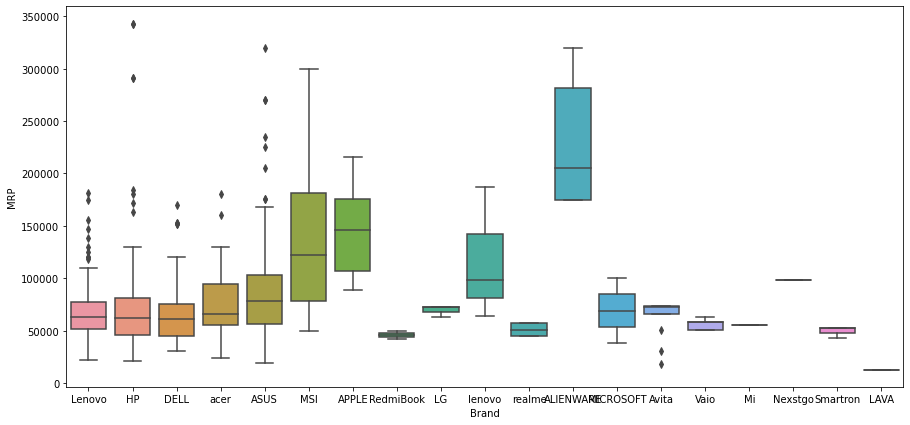

In [71]:
plt.figure(figsize=(15, 7))
sns.boxplot(x = df.Brand, y = df.MRP)

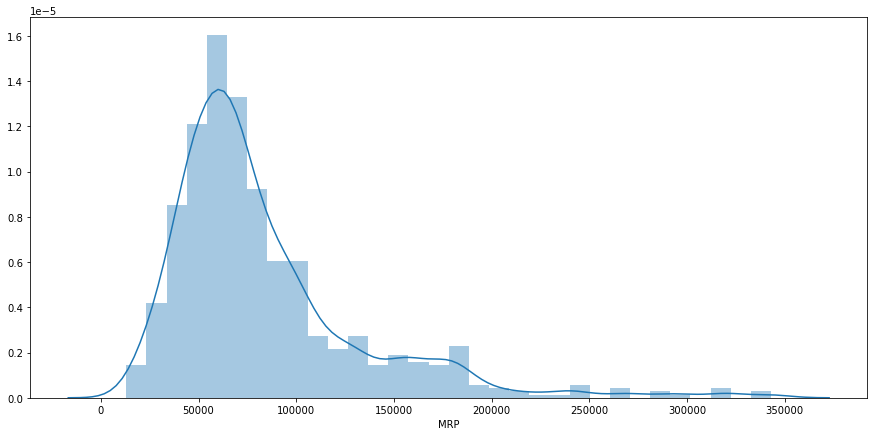

In [72]:
plt.figure(figsize=(15, 7))
sns.distplot(df.MRP)

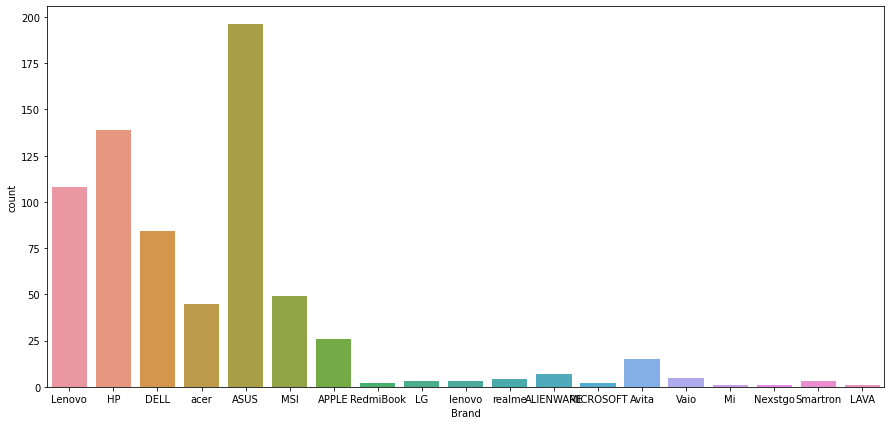

In [73]:
plt.figure(figsize=(15, 7))
sns.countplot(df.Brand)

**Observation** - The above plot show us the count for each product. We can see that ASUS is havng highest number of product listing on Flipkart website

In [74]:
df.groupby(['Brand']).agg({'MRP' : ['min', 'max', 'mean']})

MRP                         
                min       max           mean
Brand                                       
ALIENWARE  174990.0  319990.0  230561.428571
APPLE       88990.0  215990.0  140560.000000
ASUS        18999.0  319990.0   85719.426316
Avita       18090.0   73990.0   63944.600000
DELL        30990.0  169990.0   66905.642857
HP          20900.0  343000.0   74012.306569
LAVA        12999.0   12999.0   12999.000000
LG          62990.0   72990.0   69656.666667
Lenovo      21896.0  180998.0   69011.255102
MICROSOFT   38513.0   99990.0   69251.500000
MSI         49990.0  299990.0  134833.979167
Mi          54999.0   54999.0   54999.000000
Nexstgo     97990.0   97990.0   97990.000000
RedmiBook   41999.0   49999.0   45999.000000
Smartron    42990.0   52990.0   49656.666667
Vaio        50990.0   62990.0   56190.000000
acer        23990.0  179990.0   77375.904762
lenovo      63990.0  186799.0  116259.666667
realme      44999.0   56999.0   51010.500000

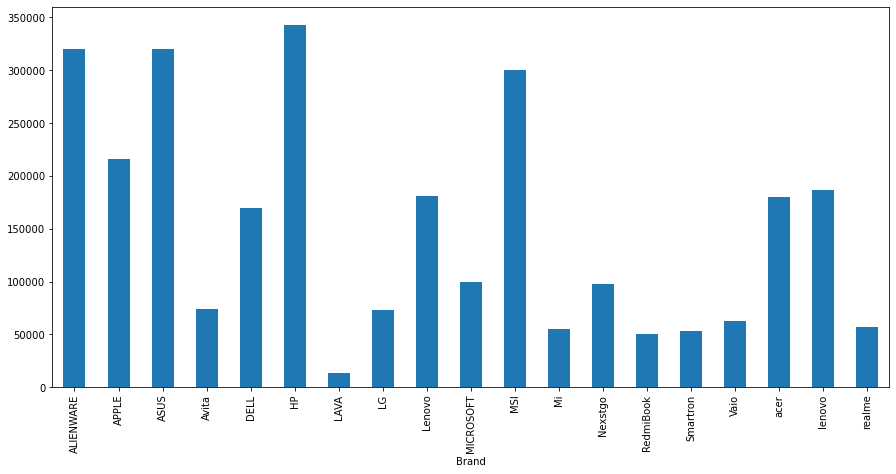

In [75]:
plt.figure(figsize=(15, 7))
df.groupby(['Brand'])['MRP'].max().plot(kind = 'bar')

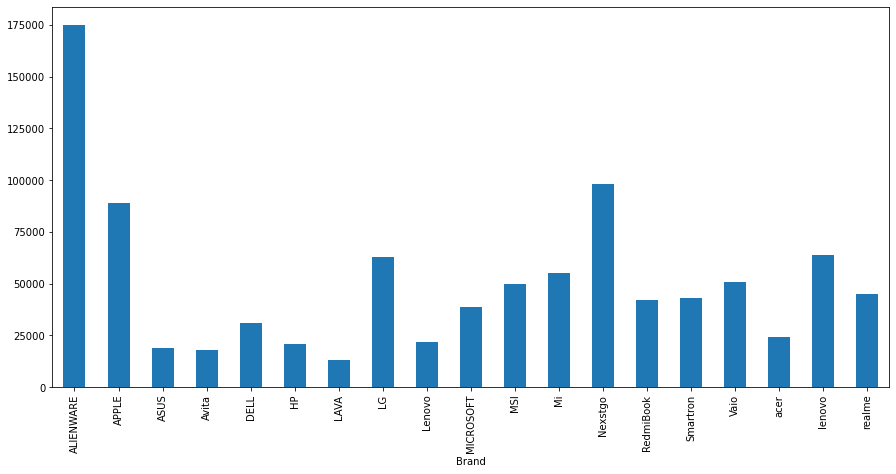

In [76]:
plt.figure(figsize=(15, 7))
df.groupby(['Brand'])['MRP'].min().plot(kind = 'bar')

**Observation** - ajbhvfhjsdbfsvjs jfsvj jh 

## Conclusion